In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install keras

In [3]:
!pip install keras-tuner

     |████████████████████████████████| 102kB 3.9MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=4c5e1630951e7caa6903482b0dd64410ee13465089b63efc3710fa24328f90d3
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [4]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   vertical_flip =  True , 
                                   rotation_range=50,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1/255)



val_datagen = ImageDataGenerator(rescale = 1/255)

In [6]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Project/Train',
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


test_data = test_datagen.flow_from_directory("/content/drive/MyDrive/Project/Test",
                                                           batch_size=32,
                                                           target_size=(64,64),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


val_data =  val_datagen.flow_from_directory("/content/drive/MyDrive/Project/Validation",
                                            batch_size=32,
                                            target_size=(64,64),
                                            class_mode='sparse',
                                            shuffle=True,seed=1)
                                           

Found 1891 images belonging to 2 classes.
Found 2239 images belonging to 2 classes.
Found 2050 images belonging to 2 classes.


In [7]:
 classes = {0:"mask_data",1:"nonmask_data"}
for i in classes.items():
    print(i)

(0, 'mask_data')
(1, 'nonmask_data')


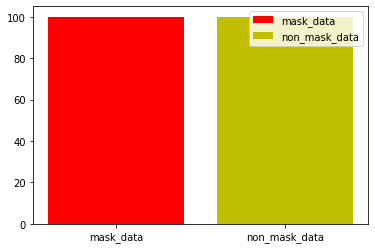

In [8]:
fig, ax = plt.subplots()
ax.bar("mask_data",100,label="mask_data",color="r")
ax.bar("non_mask_data",100,label="non_mask_data",color="y")
ax.legend()

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [10]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [11]:
data=model.fit(train_data,
    validation_data = val_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
60/60 [==============================] - 2042s 34s/step - loss: 0.4201 - accuracy: 0.8215 - val_loss: 0.1243 - val_accuracy: 0.9595
Epoch 2/50
60/60 [==============================] - 21s 352ms/step - loss: 0.2752 - accuracy: 0.8888 - val_loss: 0.1069 - val_accuracy: 0.9644
Epoch 3/50
60/60 [==============================] - 21s 354ms/step - loss: 0.2354 - accuracy: 0.9190 - val_loss: 0.0800 - val_accuracy: 0.9800
Epoch 4/50
60/60 [==============================] - 21s 352ms/step - loss: 0.1645 - accuracy: 0.9369 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 5/50
60/60 [==============================] - 21s 352ms/step - loss: 0.1365 - accuracy: 0.9427 - val_loss: 0.0532 - val_accuracy: 0.9859
Epoch 6/50
60/60 [==============================] - 21s 353ms/step - loss: 0.1420 - accuracy: 0.9522 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 7/50
60/60 [==============================] - 21s 352ms/step - loss: 0.1365 - accuracy: 0.9531 - val_loss: 0.0922 - val_accuracy: 0.9722

In [ ]:
model.evaluate(test_data)

67/70 [===========================>..] - ETA: 48s - loss: 0.1060 - accuracy: 0.9650 

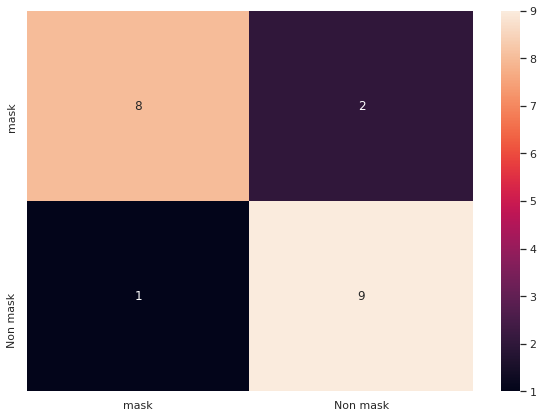

In [15]:
array  = [[8,2],[1,9]]
l = ["mask","Non mask"]
df_cm = pd.DataFrame(array, index = [i for i in  l],
                  columns = [i for i in l])
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)

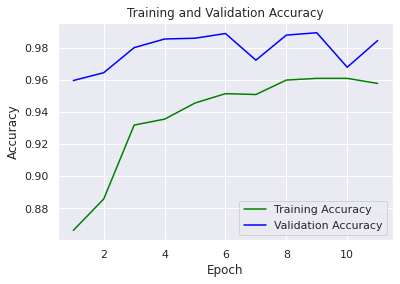

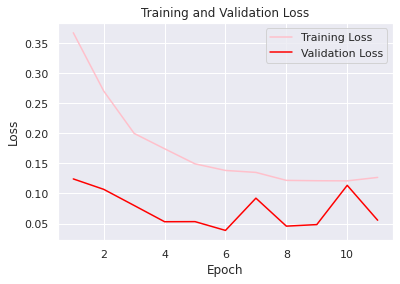

In [17]:
sb.set()

acc = data.history['accuracy']
val_acc = data.history['val_accuracy']
loss = data.history['loss']
val_loss = data.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[1. 0.]]
[0]
mask_data


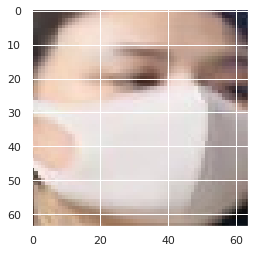

In [18]:

from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Project/Train/Withmask/0_0_0 (1).jpeg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0. 1.]]
[1]
nonmask_data


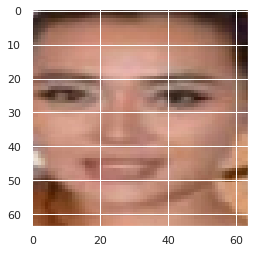

In [19]:
image_path = "/content/drive/MyDrive/Project/Train/Withoutmask/0_0_aidai_0014.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)